In [5]:
import os
import numpy as np
import pickle
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [6]:
def unpickle(file):
    with open(file, 'rb') as f:
        data = pickle.load(f, encoding="latin1")
    return data

def load_training_data(dataset_path):
    train_images = np.zeros([50000, 3072])
    train_labels = np.zeros([50000])

    start = 0
    n_images_in_a_file = 10000
    for i in range(1, 6):
        path = os.path.join(dataset_path, "data_batch_{}".format(i))
        data_dict = unpickle(path)
        train_images[start: start + n_images_in_a_file, :] = data_dict["data"]
        train_labels[start: start + n_images_in_a_file] = data_dict["labels"]
        start += n_images_in_a_file

    return np.asarray(train_images, dtype=int), np.asarray(train_labels, dtype=int)

def load_test_data(dataset_path):
    path = os.path.join(dataset_path, "test_batch")
    datadict = unpickle(path)
    test_images = datadict["data"]
    test_labels = datadict["labels"]
    return np.asarray(test_images, dtype=int), np.asarray(test_labels, dtype=int)

def visualize(images, labels, n_rows=2, n_cols=5):
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 6))
    for i in range(n_rows):
        for j in range(n_cols):
            index = i * n_cols + j
            axes[i, j].imshow(images[index].reshape(32, 32, 3) / 255.0)
            axes[i, j].axis('off')
            axes[i, j].set_title(f"Label: {labels[index]}")
    plt.show()

In [7]:
path = "../cifar-10-batches-py"
train_images, train_labels = load_training_data(path)
test_images, test_labels = load_test_data(path)

In [8]:
# Normalização de dados
scaler = StandardScaler()
train_images_normalized = scaler.fit_transform(train_images)
test_images_normalized = scaler.transform(test_images)

In [9]:
# Divisão dos dados de treinamento
train_images, val_images, train_labels, val_labels = train_test_split(
    train_images_normalized, train_labels, test_size=0.1, random_state=42
)

# Ajuste de hiperparâmetros do modelo KNN
knn_model = KNeighborsClassifier(n_neighbors=10, weights='distance', metric='manhattan')
knn_model.fit(train_images, train_labels)

KNeighborsClassifier(metric='manhattan', n_neighbors=10, weights='distance')

In [10]:
# Previsões no conjunto de testes
predicted_labels = knn_model.predict(test_images_normalized)

In [11]:
# Avaliacao de precisão
accuracy = accuracy_score(test_labels, predicted_labels)
print("KNN accuracy for CIFAR-10 =", accuracy)

KNN accuracy for CIFAR-10 = 0.3863


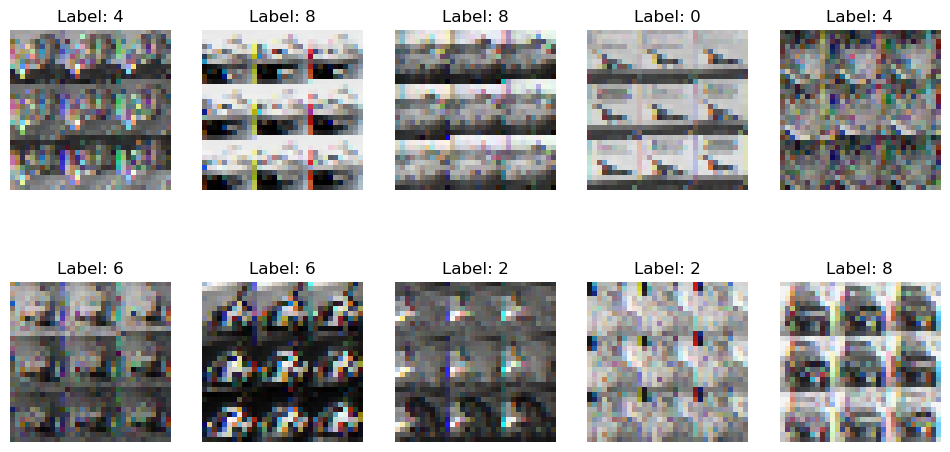

In [12]:
# Visualizacao
visualize(test_images, predicted_labels)